In [1]:
import pandas as pd
import yfinance as yf
import datetime
import time
import requests
import io
import os
import fnmatch
import numpy as np

from matplotlib import pyplot as plt


In [2]:
startdate = '20180101'
enddate = '20220101'


Here we are bringing in all the data from FINRA Daily short volume over the last year. 
For all Stock Symbols

In [3]:
# Convert dates for data parsing 
x = pd.date_range(start=startdate,end=enddate,freq='D').strftime('%Y%m%d')

# Bring in Short volume data 
sdir =  '/home/pookie/data/shortdata2/'

# Base Filename Generation
prefix = 'CNMSshvol'

# make a list of all the valid filenames to load 
xxx = []
for shortdate in x:
    #print(shortdate)
    for file in os.listdir(sdir):
        matchme = prefix+str(shortdate)+'*'
        if fnmatch.fnmatch(file, matchme):
            xxx.append(file)

            
            
mylist =[]
for filename in xxx:
    f = sdir+filename
    try: 
        dataframe = pd.read_csv(f,sep="|")
        mylist.append(dataframe)
    except:
        pass
        #print(filename, 'error')



In [4]:
# Using the list generated, concatonate them all into one big datafram
big_df = pd.concat(mylist)
# correct for error loading 
del big_df['<?xml version="1.0" encoding="UTF-8"?>']

# set the date format again     
format = '%Y%m%d'
big_df = big_df.dropna()
big_df['Datetime'] = pd.to_datetime(big_df['Date'] , format=format)
del big_df['Date']
big_df = big_df.set_index(pd.DatetimeIndex(big_df['Datetime']))

In [5]:
# Start Calculations
big_df['NetShortDaily'] = big_df.TotalVolume - \
    2*(big_df.ShortExemptVolume + big_df.ShortVolume)

In [6]:
#get all the unique symbols in the short volume data 
Symbols = big_df['Symbol'].unique()

In [7]:
# Iterate through the symbols collecting data 

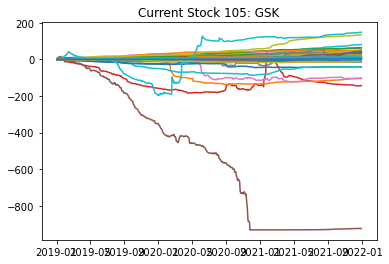

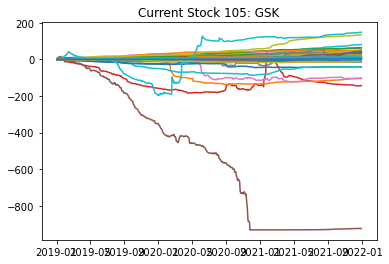

In [12]:
from IPython import display
import pylab as pl
idx = 0 
mylist = []
mydict = {}
for symbol in Symbols[3070:3175]:
    idx = idx+1
    
    try:
        TICK = yf.Ticker(symbol)
        sharesoutstanding = TICK.info['sharesOutstanding']

        s_df= big_df.loc[big_df['Symbol'] == symbol]
        #print(s_df)
        s_df['NetShortDaily'] = s_df.TotalVolume - 2*(s_df.ShortExemptVolume + s_df.ShortVolume)
        s_df['CumNetShort'] = np.cumsum(s_df.NetShortDaily)
        s_df['PercentShort'] = np.cumsum(s_df.NetShortDaily)/sharesoutstanding*100
        mylist.append(s_df)
        mydict[symbol] = [sharesoutstanding, s_df.PercentShort[-1]]

        pl.plot(s_df.PercentShort)
        plt.title('Current Stock {}: {}'.format(idx, symbol))
        display.clear_output(wait=True)
        display.display(pl.gcf())

    except:
        plt.title('Error Stock {}: {}'.format(idx, symbol))
        display.clear_output(wait=True)
        display.display(pl.gcf())


In [62]:
# create the NetShort for every entry
Symbols[3070:3080]
mydict
test = pd.DataFrame.from_dict(mydict)
test2 = test.T
test2.columns = ['SharesOutstanding','NetShortPercent']
test2_sorted = test2.sort_values('NetShortPercent')
test2_sorted

,SharesOutstanding,NetShortPercent
GPOR,1.984580e+07,-924.129609
GME,7.077180e+07,-143.741859
GNUS,3.003220e+08,-104.705234
GNPX,4.736370e+07,-101.405338
GPRO,1.250700e+08,-41.037828
...,...,...
GOLD,1.778370e+09,62.740123
GLYC,5.153900e+07,64.160251
GNK,4.191240e+07,80.807654
GROW,1.297850e+07,134.483584


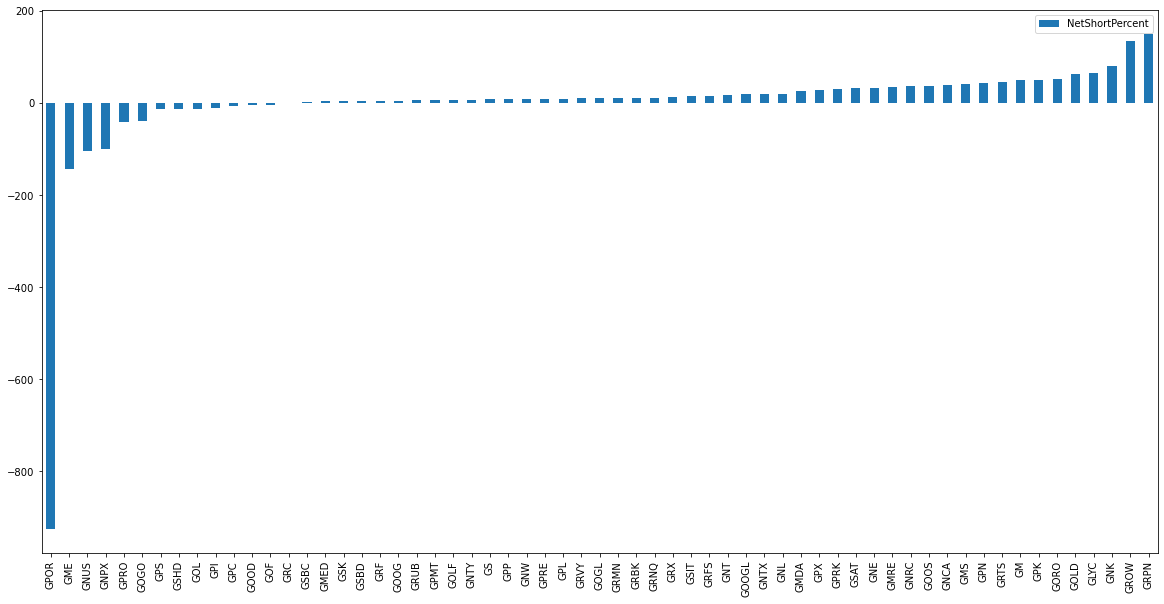

In [75]:
plt.rcParams["figure.figsize"] = (20,10)
df = test2_sorted 
ax = df.plot.bar(y='NetShortPercent', rot=0)
plt.xticks(rotation=90);

In [ ]:
#get all the unique symbols in the short volume data 
Symbols = df['Symbol'].unique()

In [ ]:
df['TotalVolume'].sum()/1e9

In [ ]:
df['NetShortDaily'].sum()/1e9

In [ ]:
#derp = df.loc[df['Symbol'] == 'GME']

In [ ]:
MktCap  = {}
for symbol in Symbols:
    print(symbol)
    try: 
        TICK = yf.Ticker(symbol)
        mktcap = TICK.info['sharesOutstanding']
        MktCap[symbol] = mktcap
    except:
        print('error with {}'.format(symbol))



In [ ]:
print(yf.Ticker('AAAU').info)

In [ ]:
netshort = (derp.TotalVolume-2*(derp.ShortExemptVolume+derp.ShortVolume))/1e6
plt.plot(derp.Datetime, netshort)

In [ ]:
Symbols = df['Symbol'].unique()

In [ ]:
#Symbols.sort()
#for ticker in Symbols:
#    print(ticker)

In [ ]:
Symbols.size

In [ ]:
TICK = yf.Ticker('GME')
mktcap = TICK.info['sharesOutstanding']

In [ ]:
TICK.get_institutional_holders()